In [1]:
import numpy as np
import pickle
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import sqlite3

In [3]:
import sys
sys.path.append("../chembl_analyser/module/")
from calcula_tanimoto import *

In [4]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors, rdMolDescriptors, AllChem, QED
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
#We suppres stdout from invalid smiles and validations
from rdkit import rdBase
rdBase.DisableLog ( 'rdApp.*')

In [5]:
smiles_target = "C=C[C@](C)(O)CCC=C(C)C"

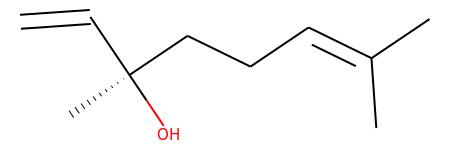

In [6]:
mol = Chem.MolFromSmiles(smiles_target)
display(mol)

In [7]:
con_ligs = sqlite3.connect("ligantes_linalool+.db")

In [31]:
data = pd.read_sql("select * from novos_ligantes_v2", con_ligs)

In [32]:
len(data.loc[data.Smiles.str.contains('#')].sort_values(by='active_probability', ascending=False))

31

In [33]:
data = data.round(4)

In [34]:
data.sort_values(by='i_tanimoto', ascending=False)

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto
19568,CCC(C)=CCCC(C)(C)O,2.8938000000000015,20.23,156.15141526,0.6204269925147669,1,1,0.0006264503832761266,0.670
19945,CCC(C)=CCCC(C)(C)O,2.8938000000000015,20.23,156.15141526,0.6204269925147667,1,1,0.0006264503832761266,0.670
20535,CC(C)=CC(C)CC(C)(C)O,2.7497000000000016,20.23,156.15141526,0.6228561127376835,1,1,1.1249092470390622e-05,0.660
7134,CC(C)=CC(C)CC(C)(C)O,2.7497000000000007,20.23,156.15141526,0.6228561127376834,1,1,1.1249092470390622e-05,0.660
19537,CC(C)=CCCC1(O)CCC1,2.647800000000001,20.23,154.135765196,0.6194978897239473,1,1,0.0001469893623268397,0.540
...,...,...,...,...,...,...,...,...,...
4226,Oc1ccc(C(F)(F)F)cc1,2.4109999999999996,20.23,162.02924944,0.6205760233110342,1,1,0.0006168121049267209,0.010
1181,Nc1ccccc1C(F)F,2.2064000000000004,26.02,143.054655664,0.5990066223887058,1,1,6.228611297893845e-05,0.000
8826,N=Nc1ccc2ccccc2c1,3.502270000000002,36.21,156.068748256,0.6132715287270338,2,1,0.0001620675093553364,0.000
21504,Oc1ccccc1C(F)F,2.3297999999999996,20.23,144.038671252,0.6408389716265135,1,1,0.00010093051489332149,0.000


In [35]:
data[['Smiles', 'i_tanimoto']]

,Smiles,i_tanimoto
0,Cc1c(O)ccc2c1CCC2,0.030
1,OCCC1(c2ccccc2)CC1,0.090
2,Cc1cccc2ccc(O)cc12,0.030
3,CC1CC(C(C)(C)C)C1(C)O,0.160
4,CC1=CCC(O)CC1C(C)C,0.300
...,...,...
24276,CC1=CC(C)Oc2ccccc21,0.070
24277,CC(C1CCCC1)C(C)(C)O,0.200
24278,Cc1cc(C)c(Cl)c(O)c1,0.030
24279,CC1CC(C)(C)CC(C)(O)C1,0.200


In [45]:
smiles_all = data.drop_duplicates()

In [49]:
smiles_all = smiles_all[['Smiles', 'i_tanimoto']].sort_values(by='i_tanimoto', ascending=False)[:30]
#.to_csv("linalool+.csv")

In [50]:
smiles_all.drop_duplicates()

,Smiles,i_tanimoto
19945,CCC(C)=CCCC(C)(C)O,0.670
7134,CC(C)=CC(C)CC(C)(C)O,0.660
4242,CC(C)=CCCC1(O)CCC1,0.540
14345,CCC=C(C)CCC(C)(C)O,0.520
18522,CCCC=CC1(O)C=CCC1,0.500
2711,CCC(C)=CC(O)CC(C)C,0.490
994,CCC1(O)CC(C=C(C)C)C1,0.490
14159,CCCCC=CC1(O)CCC1,0.480
4838,CC1(O)C=CCCCCCC1,0.480
127,CCCC=CC1(O)CCCC1,0.480


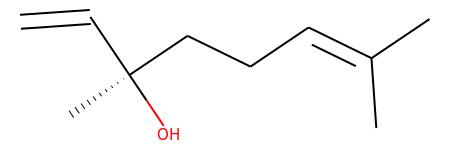

In [40]:
Chem.MolFromSmiles(smiles_target)

In [52]:
smiles_all.Smiles.drop_duplicates()

19945        CCC(C)=CCCC(C)(C)O
7134       CC(C)=CC(C)CC(C)(C)O
4242         CC(C)=CCCC1(O)CCC1
14345        CCC=C(C)CCC(C)(C)O
18522         CCCC=CC1(O)C=CCC1
2711         CCC(C)=CC(O)CC(C)C
994        CCC1(O)CC(C=C(C)C)C1
14159          CCCCC=CC1(O)CCC1
4838           CC1(O)C=CCCCCCC1
127            CCCC=CC1(O)CCCC1
18836    CC(C)=CC1(O)CC(C)(C)C1
22632        CC1=CC(C)(O)CCCCC1
10786      C=CC=CC1C=CC(C)(O)C1
3404         CC1C=CC(C)(O)CCCC1
3811         CC(C)=CC1(O)CCCCC1
13476        CCC(C)=CC1(O)CCCC1
6182         CC(C)C=CC1(O)CCCC1
15962      CC(C)=CC1CCC(C)(O)C1
23664        OC1(C=C2CCCC2)CCC1
122          CC(C)(O)CCC1=CCCC1
4440           CC=CCCC1(O)CCCC1
14000      CCC(C)=CC(C)(O)C1CC1
15854     C=C(C)C(C)(O)CC1C=C1C
Name: Smiles, dtype: object

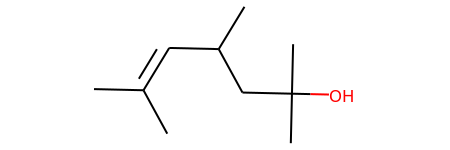

In [53]:
Chem.MolFromSmiles(smiles_all.Smiles[7134])

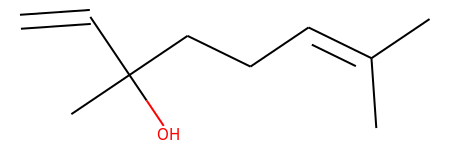

In [17]:
Chem.MolFromSmiles(smiles_all.Smiles[12431])

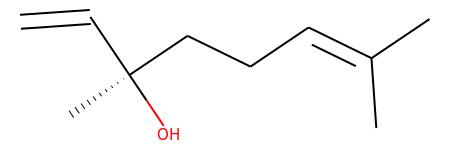

In [18]:
mol

In [19]:
Chem.MolFromSmiles("C=CC(C)(O)CCC=C(C)C").HasSubstructMatch(mol)

True

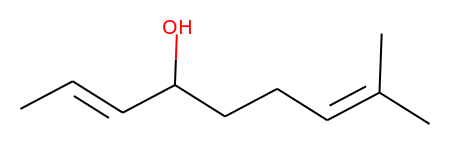

In [28]:
Chem.MolFromSmiles("CC=CC(O)CCC=C(C)C")

In [20]:
lista = [Chem.MolFromSmiles(x) for x in smiles_all.Smiles]

In [21]:
subms = [x for x in lista if x.HasSubstructMatch(mol)]
subms.append(mol)
len(subms)

2

In [22]:
AllChem.Compute2DCoords(mol)

0

In [30]:
for m in subms:
  _ = AllChem.GenerateDepictionMatching2DStructure(m,mol)
img=Draw.MolsToGridImage(subms,molsPerRow=2,subImgSize=(200,200), legends=['Composto 1', 'Linalool'])    
img
img.save('composto_semelhante.png') 